# Linear Regression Practice

In [0]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '15nV1jtdkFYedKND8816dTMqSOXYs3tw7'
downloaded = drive.CreateFile({'id': file_id})
sat = []
gpa = []
for str in downloaded.GetContentString().split('\n'):
  if(len(str) > 0):
    coords = str.split(',')
    try:
      sat.append(float(coords[0]))
      gpa.append(float(coords[1]))
    except:
      continue

In [0]:
sat = np.array(sat)
gpa = np.array(gpa)
theta_0 = 2
theta_1 = 4
alpha = 3e-8
m = len(gpa)

Text(0, 0.5, 'GPA')

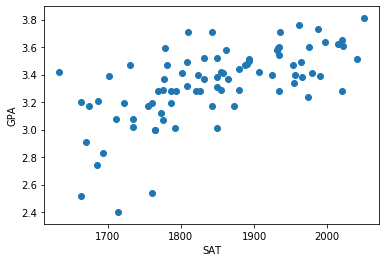

In [4]:
plt.scatter(sat,gpa)
plt.xlabel('SAT')
plt.ylabel('GPA')

\begin{gathered}
\text{Cost function equation:}\newline
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x_i) - y_i)^2,
\text{ where } (x_i,y_i) \text{ represents a single training data}\newline\newline
\text{The equation above can be simplified to:}\newline\newline
J(\theta) = \frac{1}{2m}z,
\text{ where } z = \sum_{i=1}^m (\theta_0+\theta_1X-Y)^2 = [z_1,...,z_m]_{1xm}\newline
\text{ and } X = [x_1,...,x_m], \text{ }Y = [y_1,...,y_m]
\end{gathered}

In [0]:
def calculateCost(matrix_x,matrix_y,m):
    global theta_0,theta_1
    cost = (1 / (2 * m)) * ((theta_0 + (theta_1 * matrix_x) - matrix_y) ** 2).sum()
    return cost

In [0]:
def gradDescent(alpha,matrix_x,matrix_y,iter = 10000,eps = 0.05):
    global theta_0,theta_1,m,cost,sat,gpa
    cost = calculateCost(sat,gpa,m)
    iters = 0
    cost_hist=[cost]
    for i in range(iter):
        temp_0 = theta_0 - alpha * (1 / m) * (theta_0 + theta_1 * matrix_x - matrix_y).sum()
        temp_1 = theta_1 - alpha * (1 / m) * (matrix_x.transpose().dot(theta_0 + theta_1 * matrix_x - matrix_y)).sum()
        theta_0 = temp_0
        theta_1 = temp_1
        cost = calculateCost(sat,gpa,m)
        cost_hist.append(cost)
        
        iters += 1
        if cost < eps:
            print(f"Iterations: {iters}")
            print(f"Cost: {cost}")
            return cost_hist
    print(f"Cost: {cost}")
    print(f"Iterations: {iters}")

Iterations: 106
Cost: 0.029377026671049734
1.9978395486883478 0.0007671725954255421


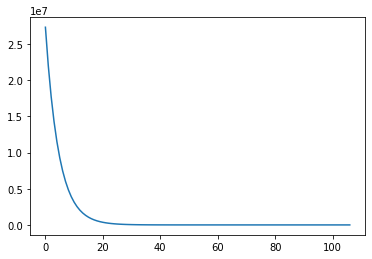

In [54]:
cost_hist = gradDescent(alpha,sat,gpa,10**8,0.03)
if(cost_hist == None):
    print("\nBatch gradient descent did not converge")
else:
    print(theta_0,theta_1)
    plt.plot(cost_hist)

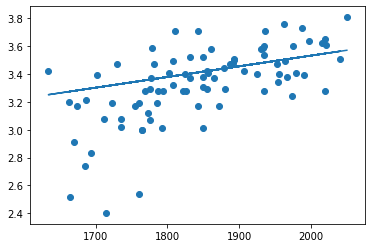

In [55]:
y = theta_0 + theta_1 * sat

plt.plot(sat,y)
plt.scatter(sat,gpa)